In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/loan_data_1.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,State,BankState,ApprovalFY,Term,NoEmp,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,Industry,IsFranchise,NewBusiness,Default,DisbursementFY,DaysToDisbursement,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession
0,IN,OH,1997,84,4,0,0,1,60000.0,60000.0,Retail_trade,0,1,0,1999,730,0.80,1,0,0
1,IN,IN,1997,60,2,0,0,1,40000.0,40000.0,Accom/Food_serv,0,1,0,1997,92,0.80,1,0,0
2,IN,IN,1997,180,7,0,0,0,287000.0,287000.0,Healthcare/Social_assist,0,0,0,1997,306,0.75,1,0,1
3,OK,OK,1997,60,2,0,0,1,35000.0,35000.0,Unknown,0,0,0,1997,122,0.80,1,0,0
4,FL,FL,1997,240,14,0,0,0,229000.0,229000.0,Unknown,0,0,0,1997,75,1.00,1,1,1


In [3]:
df.describe(include=['object', 'float', 'int'])

,State,BankState,ApprovalFY,Term,NoEmp,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,Industry,IsFranchise,NewBusiness,Default,DisbursementFY,DaysToDisbursement,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession
count,590501,590501,590501.000000,590501.000000,590501.000000,590501.000000,590501.000000,590501.000000,5.905010e+05,5.905010e+05,590501,590501.000000,590501.000000,590501.000000,590501.000000,590501.000000,590501.000000,590501.000000,590501.000000,590501.000000
unique,51,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,78404,62148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2000.313005,105.768923,11.966981,0.676092,0.321198,0.096660,1.802357e+05,1.678567e+05,NaN,0.042024,0.269822,0.185122,2000.425303,122.240650,0.701142,0.709067,0.154259,0.642786
std,NaN,NaN,6.471176,75.840460,76.489927,0.653218,0.466937,0.295495,2.478930e+05,2.406298e+05,NaN,0.200643,0.443867,0.388397,6.453970,252.316475,0.183455,0.454193,0.361197,0.479179
min,NaN,NaN,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,1.000000e+03,NaN,0.000000,0.000000,0.000000,1974.000000,-36479.000000,0.050000,0.000000,0.000000,0.000000
25%,NaN,NaN,1995.000000,60.000000,2.000000,0.000000,0.000000,0.000000,4.000000e+04,3.000000e+04,NaN,0.000000,0.000000,0.000000,1995.000000,32.000000,0.500000,0.000000,0.000000,0.000000
50%,NaN,NaN,2002.000000,84.000000,4.000000,1.000000,0.000000,0.000000,9.100000e+04,7.500000e+04,NaN,0.000000,0.000000,0.000000,2002.000000,63.000000,0.750000,1.000000,0.000000,1.000000
75%,NaN,NaN,2006.000000,120.000000,11.000000,1.000000,1.000000,0.000000,2.150000e+05,2.000000e+05,NaN,0.000000,1.000000,0.000000,2006.000000,128.000000,0.850000,1.000000,0.000000,1.000000


In [4]:
df.isnull().sum()

State                 0
BankState             0
ApprovalFY            0
Term                  0
NoEmp                 0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
Industry              0
IsFranchise           0
NewBusiness           0
Default               0
DisbursementFY        0
DaysToDisbursement    0
SBA_AppvPct           0
AppvDisbursed         0
RealEstate            0
GreatRecession        0
dtype: int64

In [5]:
df.shape

(590501, 20)

In [6]:
df['DisbursedGreaterAppv'] = np.where(df['DisbursementGross'] > df['GrAppv'], 1, 0)

### Remove records with loans disbursed prior to being approved


In [7]:
df = df[df['DaysToDisbursement'] >= 0]
# Check how many records are left
df.shape

(589930, 21)

In [8]:
df.Industry

0                     Retail_trade
1                  Accom/Food_serv
2         Healthcare/Social_assist
3                          Unknown
4                          Unknown
                    ...           
590496                     Unknown
590497                Retail_trade
590498               Manufacturing
590499                     Unknown
590500                     Unknown
Name: Industry, Length: 589930, dtype: object

In [9]:
df.dtypes

State                    object
BankState                object
ApprovalFY                int64
Term                      int64
NoEmp                     int64
UrbanRural                int64
RevLineCr                 int64
LowDoc                    int64
DisbursementGross       float64
GrAppv                  float64
Industry                 object
IsFranchise               int64
NewBusiness               int64
Default                   int64
DisbursementFY            int64
DaysToDisbursement        int64
SBA_AppvPct             float64
AppvDisbursed             int64
RealEstate                int64
GreatRecession            int64
DisbursedGreaterAppv      int32
dtype: object

In [10]:
numeric_df = df.select_dtypes(include=['number'])

In [11]:
numeric_df.dtypes

ApprovalFY                int64
Term                      int64
NoEmp                     int64
UrbanRural                int64
RevLineCr                 int64
LowDoc                    int64
DisbursementGross       float64
GrAppv                  float64
IsFranchise               int64
NewBusiness               int64
Default                   int64
DisbursementFY            int64
DaysToDisbursement        int64
SBA_AppvPct             float64
AppvDisbursed             int64
RealEstate                int64
GreatRecession            int64
DisbursedGreaterAppv      int32
dtype: object

## DATA VISUALISATION:

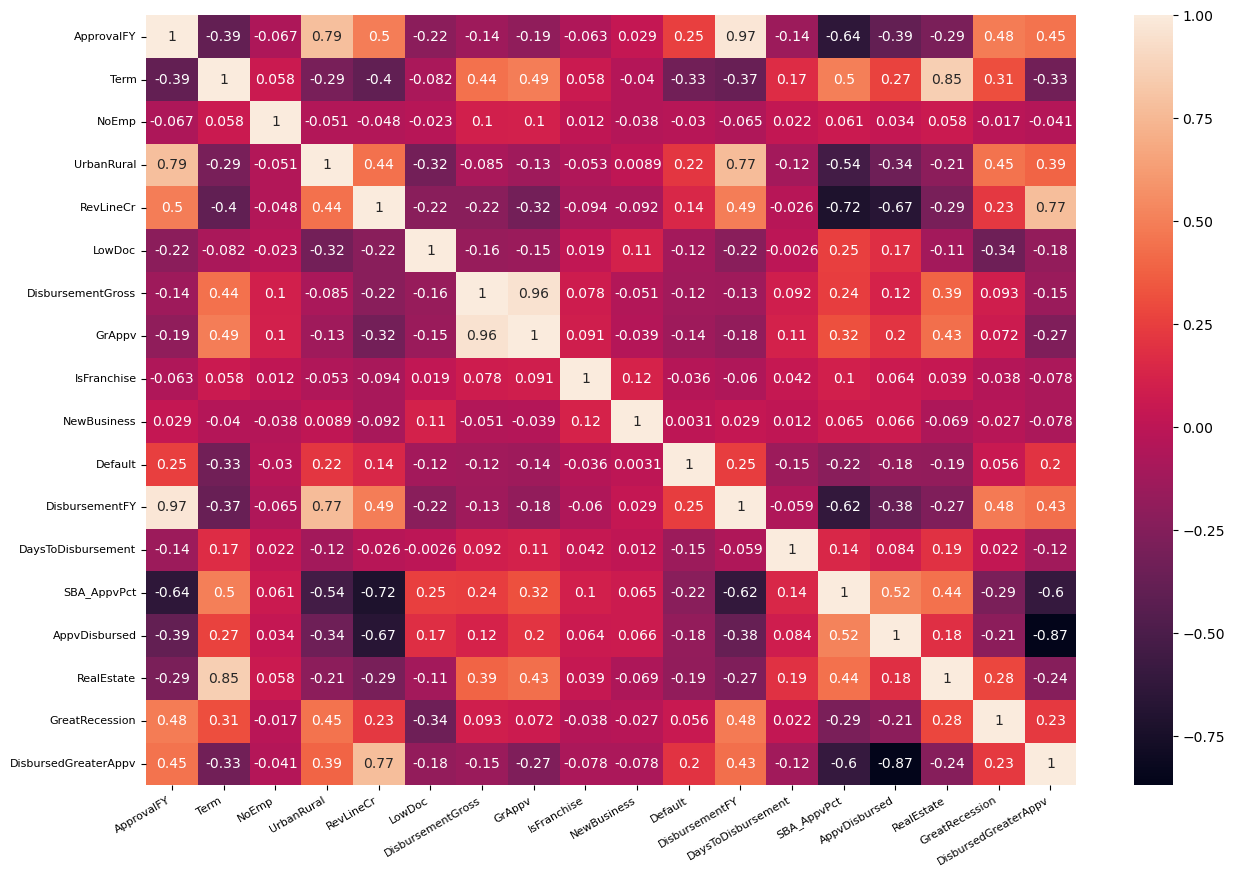

In [12]:
# Correlation Matrix
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = numeric_df.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

C:\Users\msi\AppData\Local\Temp\ipykernel_9420\1840661994.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)
C:\Users\msi\AppData\Local\Temp\ipykernel_9420\1840661994.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)


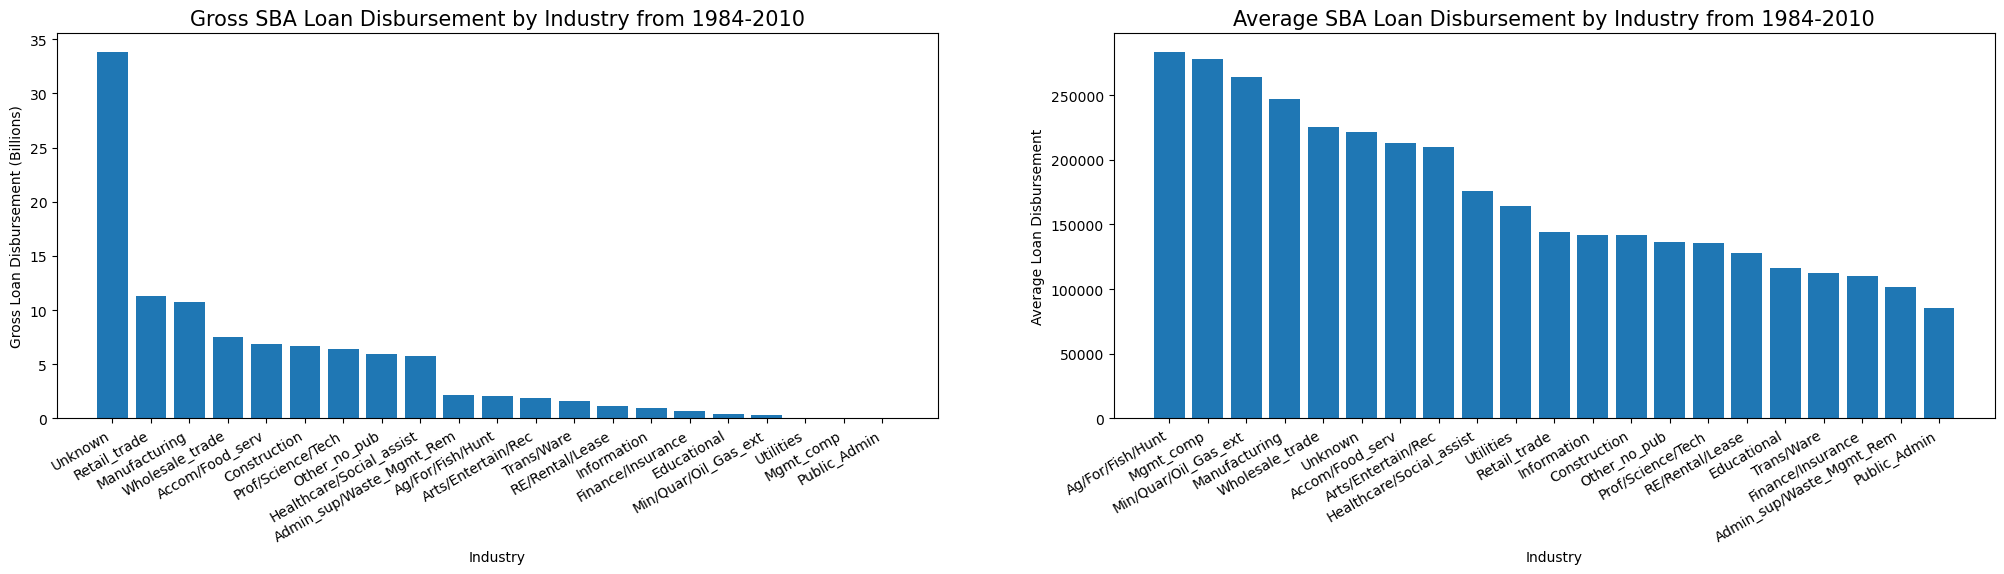

In [13]:
# Total/Average disbursed loan amount by industry
# Create a groupby object on Industry for use in visualization
industry_group = df.groupby(['Industry'])

# Data frames based on groupby by Industry looking at aggregate and average values
df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
df_industryAve = industry_group.mean(numeric_only=True).sort_values('DisbursementGross', ascending=False)

# Establish figure for placing bar charts side-by-side
fig = plt.figure(figsize=(25, 5))

# Add subplots to figure to build 1x2 grid and specify position of each subplot
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Bar chart 1 = Gross SBA Loan Disbursement by Industry
ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Gross Loan Disbursement (Billions)')

# Bar chart 2 = Average SBA Loan Disbursement by Industry
ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Average Loan Disbursement')

plt.show()


### Average days to disbursement by industry

C:\Users\msi\AppData\Local\Temp\ipykernel_9420\1114991150.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,


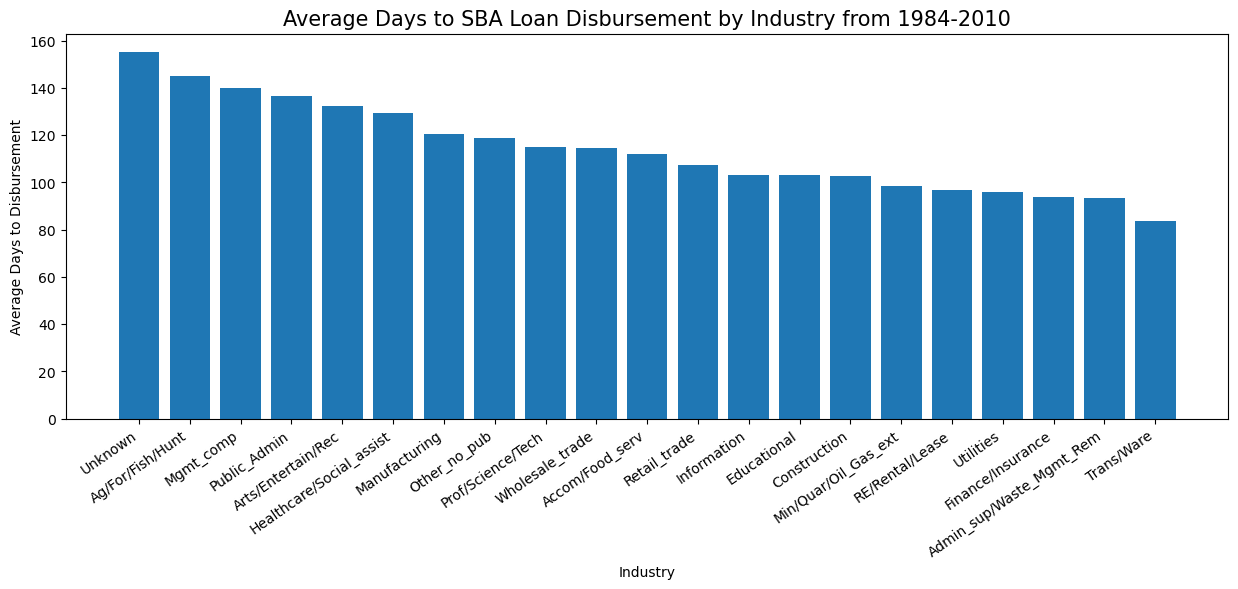

In [14]:
fig2, ax = plt.subplots(figsize=(15, 5))

ax.bar(df_industryAve.index, df_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

### Paid in full and defaulted loans

C:\Users\msi\AppData\Local\Temp\ipykernel_9420\3477611438.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1a.set_xticklabels(df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,


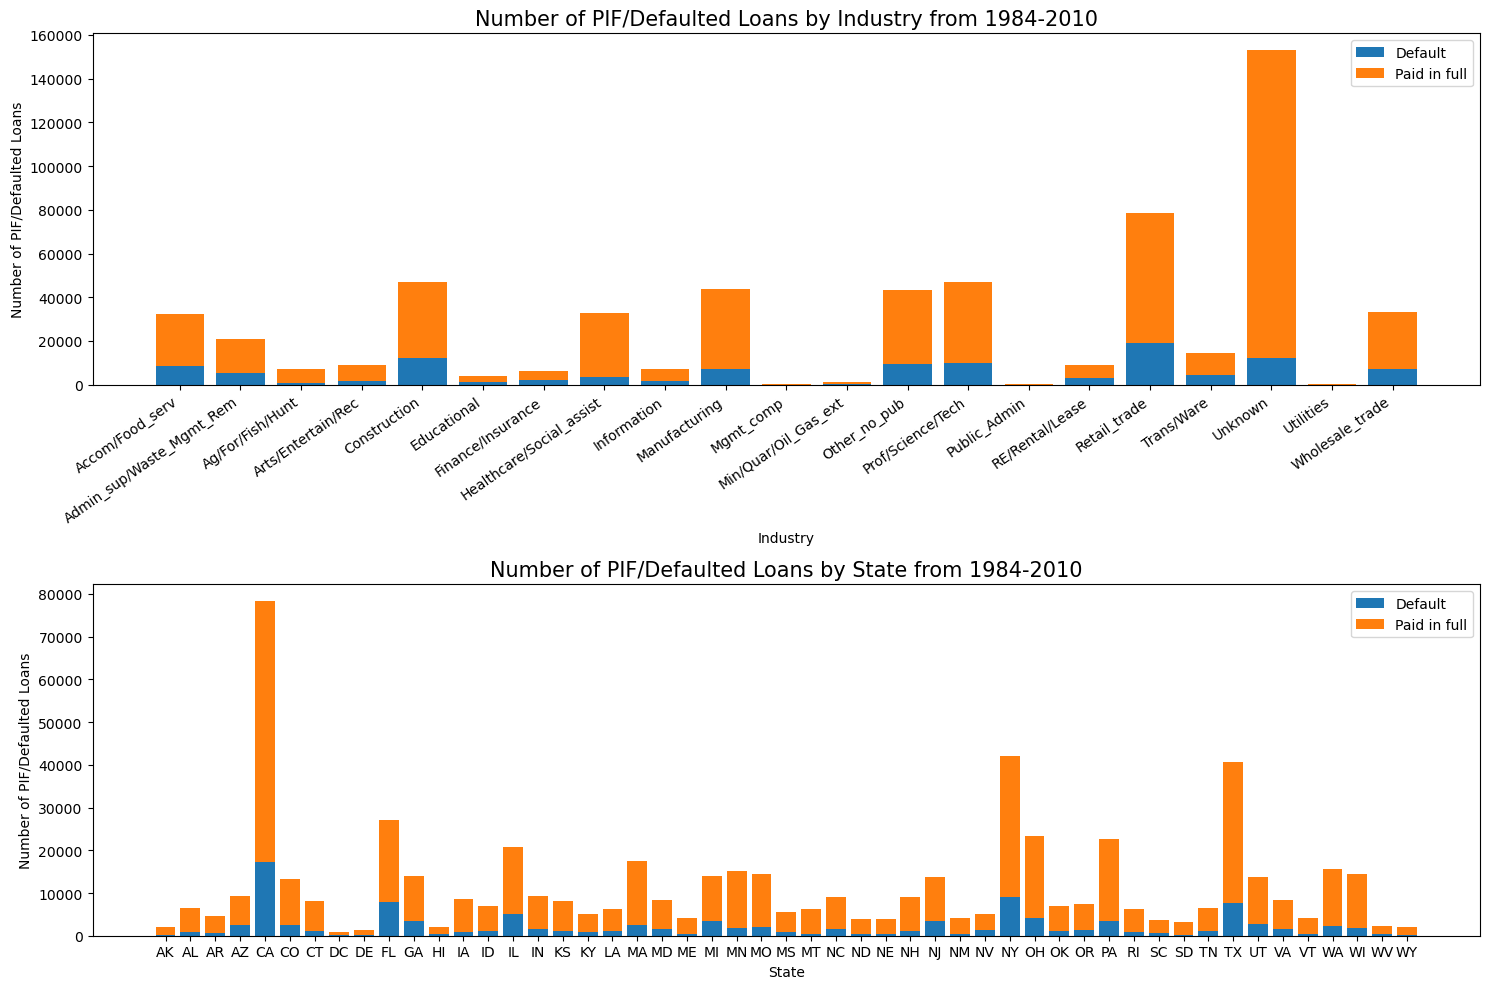

In [15]:

fig3 = plt.figure(figsize=(15, 10))

ax1a = plt.subplot(2, 1, 1)
ax2a = plt.subplot(2, 1, 2)

# Function for creating stacked bar charts grouped by desired column
# df = original data frame, col = x-axis grouping, stack_col = column to show stacked values
# Essentially acts as a stacked histogram when stack_col is a flag variable
def stacked_setup(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], label='Default')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full')


# Number of Paid in full and defaulted loans by industry
stacked_setup(df=df, col='Industry', axes=ax1a)
ax1a.set_xticklabels(df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=15)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()

# Number of Paid in full and defaulted loans by State
stacked_setup(df=df, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()

### Check Default percentage by Industry

In [16]:
def_ind = df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])
def_ind

Default,0,1,Def_Percent
Industry,,,
Accom/Food_serv,23843,8367,0.259764
Admin_sup/Waste_Mgmt_Rem,15693,5421,0.256749
Ag/For/Fish/Hunt,6490,654,0.091545
Arts/Entertain/Rec,6978,1918,0.215603
Construction,34912,12034,0.256337
Educational,2743,1067,0.280052
Finance/Insurance,3962,2087,0.345016
Healthcare/Social_assist,29089,3560,0.109039
Information,5203,1825,0.259676


#### Check Default percentage by State

In [17]:
def_state = df.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state

Default,0,1,Def_Percent
State,,,
AK,1724,230,0.117707
AL,5461,969,0.150700
AR,3889,698,0.152169
AZ,6743,2587,0.277278
CA,61089,17243,0.220127
CO,10685,2594,0.195346
CT,6878,1177,0.146120
DC,772,174,0.183932
DE,1181,263,0.182133


#### Paid in full and Defaulted loans by DisbursementFY

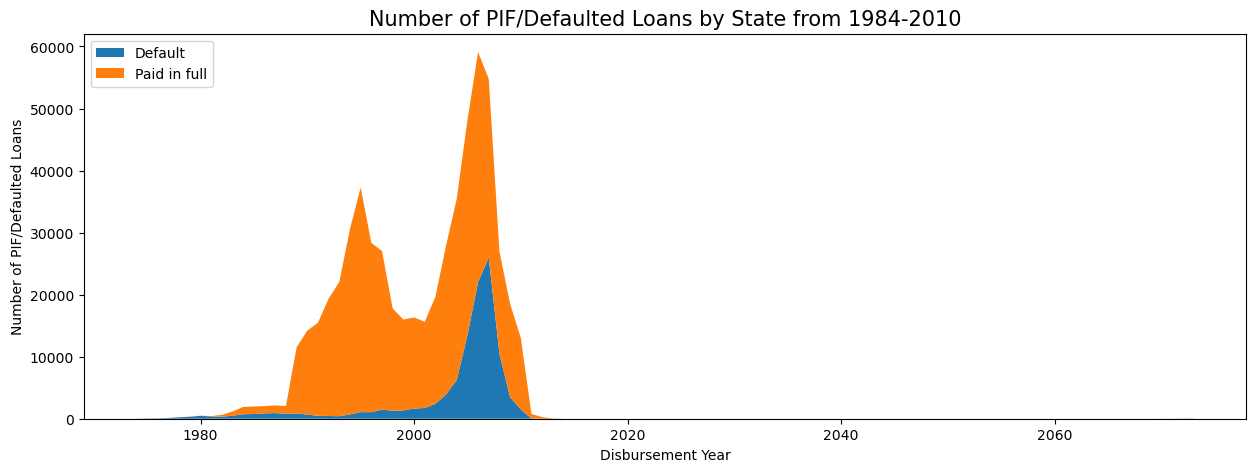

In [18]:
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = df.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')
x = stack_data.index
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')

plt.show()

## Paid in full and defaulted loans backed by Real Estate

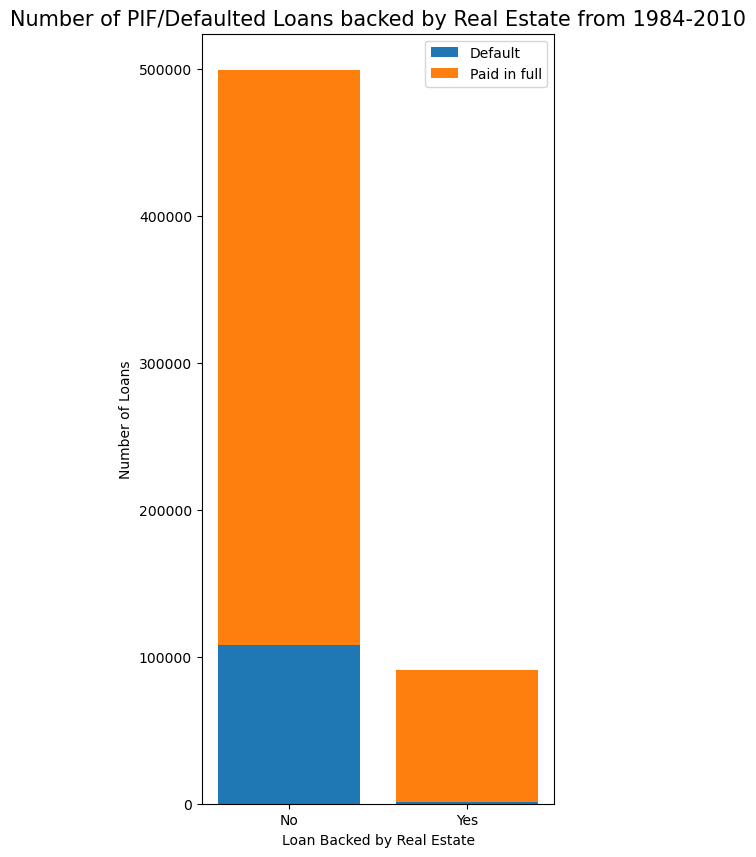

In [19]:
fig5 = plt.figure(figsize=(10, 10))

ax1b = fig5.add_subplot(1, 2, 1)


stacked_setup(df=df, col='RealEstate', axes=ax1b)
ax1b.set_xticks(df.groupby(['RealEstate', 'Default'])['RealEstate'].count().unstack('Default').index)
ax1b.set_xticklabels(labels=['No', 'Yes'])

ax1b.set_title('Number of PIF/Defaulted Loans backed by Real Estate from 1984-2010', fontsize=15)
ax1b.set_xlabel('Loan Backed by Real Estate')
ax1b.set_ylabel('Number of Loans')
ax1b.legend()


plt.show()

### Paid in full and defaulted loans active during the Great Recession

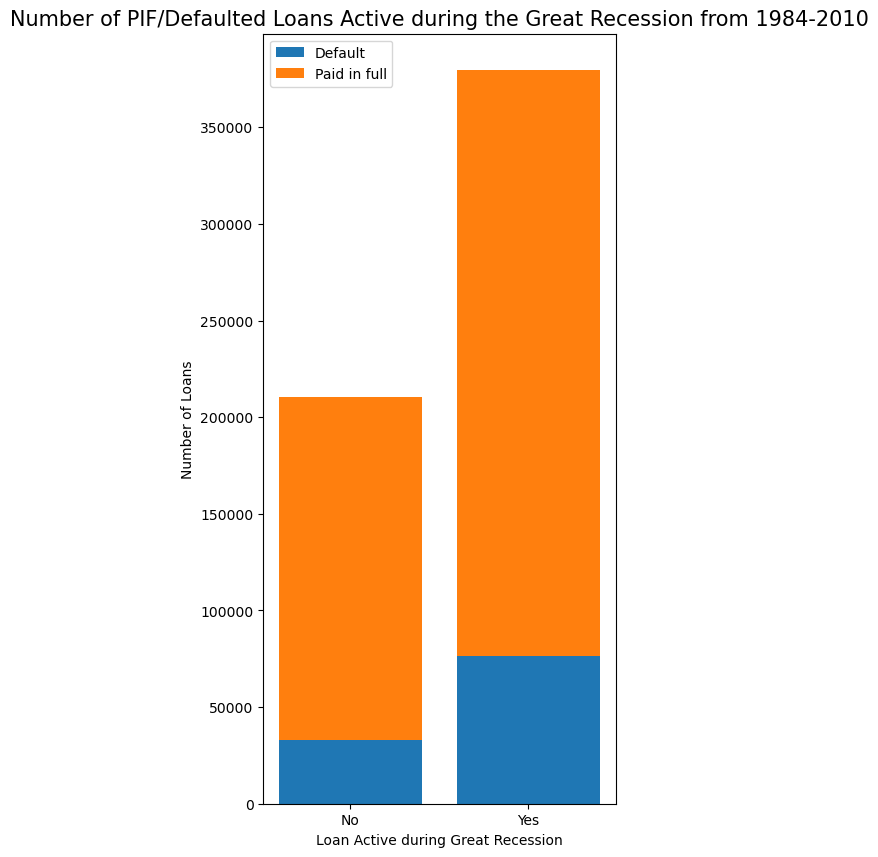

In [20]:
fig5 = plt.figure(figsize=(10, 10))
ax2b = fig5.add_subplot(1, 2, 2)
stacked_setup(df=df, col='GreatRecession', axes=ax2b)
ax2b.set_xticks(df.groupby(['GreatRecession', 'Default'])['GreatRecession'].count().unstack('Default').index)
ax2b.set_xticklabels(labels=['No', 'Yes'])

ax2b.set_title('Number of PIF/Defaulted Loans Active during the Great Recession from 1984-2010', fontsize=15)
ax2b.set_xlabel('Loan Active during Great Recession')
ax2b.set_ylabel('Number of Loans')
ax2b.legend()

plt.show()

### Check Default percentage for loans backed by Real Estate

In [21]:
def_re = df.groupby(['RealEstate', 'Default'])['RealEstate'].count().unstack('Default')
def_re['Def_Percent'] = def_re[1]/(def_re[1] + def_re[0])
def_re

Default,0,1,Def_Percent
RealEstate,,,
0,390935,107970,0.216414
1,89751,1274,0.013996


### Check Default percentage for loans active during the Great Recession

In [22]:
def_gr = df.groupby(['GreatRecession', 'Default'])['GreatRecession'].count().unstack('Default')
def_gr['Def_Percent'] = def_gr[1]/(def_gr[1] + def_gr[0])
def_gr

Default,0,1,Def_Percent
GreatRecession,,,
0,177650,32805,0.155877
1,303036,76439,0.201434


In [23]:
df.dtypes

State                    object
BankState                object
ApprovalFY                int64
Term                      int64
NoEmp                     int64
UrbanRural                int64
RevLineCr                 int64
LowDoc                    int64
DisbursementGross       float64
GrAppv                  float64
Industry                 object
IsFranchise               int64
NewBusiness               int64
Default                   int64
DisbursementFY            int64
DaysToDisbursement        int64
SBA_AppvPct             float64
AppvDisbursed             int64
RealEstate                int64
GreatRecession            int64
DisbursedGreaterAppv      int32
dtype: object